In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate

## 1. Обыкновенные дифференциальные уравнения

Дифференциальные уравнения – один из основных инструментов математического моделирования.
С помощью диф.уравнений описывается огромное количество процессов и явлений в физике, технике, химиии, биологии, экономике, социологии и др. Исследуя дифференциальные уравнения, мы можем делать выводы по поводу описываемой ситуации.

Рассмотрим следующую задачу.
Скорость роста некоторой популяции организмов пропорциональна ее объему, причем на коэффициент пропорциональности влияет сезонная составляющая. Требуется определить объем популяции как функцию времени, если объем популяции в начальный момент известен.

Обозначим объем популяции через $y$.
Тот факт, что $y$ является функцией времени $t$ будем записывать так: $y=y(t)$.
Тогда 
$$
    y'\equiv\frac{dy}{dt}
$$
– скорость роста популяции.
Получаем
$$
    y' = (\alpha + \beta \sin t)y,   \tag{1}
$$
где слагаемое $\beta \sin t$ соответствует сезонной составляющей.
Коэффициенты $\alpha$ и $\beta$ предполагаются известными.
Также известен объем популяции в начальный момент времени:
$$
    y(0) = y_0.                     \tag{2}
$$
Мы свели задачу к задаче нахождения функции $y(t)$,
удовлетворяющей *дифференциальному уравнению* (1) 
и *начальному условию* (2).

Вообще, дифференциальными уравнениями называют уравнения, содержащие производные неизвестных функций. 
Простейшими из дифференциальных уравнений являются уравнения *первого порядка*
$$
    g(t, y, y') = 0,      \tag{3}
$$
где $y = y(t)$ – неизвестная (искомая) функция, $t$ – независимая переменная,
а $g$ – заданная функция трех аргументов.
Уравнение (3) имеет первый порядок, так как
в нем встречаются производные искомой функции только первого порядка.
Простейшими из дифференциальных уравнений первого порядка
являются уравнения, *разрешенные относительно производной*:
$$
    y' = f(t, y).  \tag{4}
$$
Именно таким является уравнение (1).

В огромном числе приложений дифференциальные уравнения
описывают процессы, *протекающие во времени*, 
независимая переменная в таких примерах – это время, и хотя существуют примеры,
в которых это не так, мы, следуя сложившейся традиции,
в модельных задачах также будем называть независимую
переменную временем.

В отличие от алгебраических уравнений в дифференциальных уравнениях
искомыми являются не скалярные значения, а целые функции.
Любая дифференцируемая функция $y(t)$, 
удовлетворяющая уравнению (3) или, скажем, (4), 
называется его *частным решением*. Множество всех частных решений данного уравнений
называется его *общим решением*.
Нахождение решения (частного или общего) называют также
*интегрированием* дифференциального уравнения.

Неизвестные функции, которые у нас встречались и будут встречаться в дифференциальных уравнениях, зависят только от одной переменной. Такие дифференциальные уравнения называются *обыкновенными*. Кроме обыкновенных дифуров бывают еще *дифференциальные уравнения в частных производных* (дифур.ч.п.) - в них неизвестные функции зависят уже не от одной независимой переменной, а от двух или большего их количества, поэтому в уравнениях появляются частные производные.


Иногда (но далеко не всегда)
дифференциальное уравнение удается решить аналитически,
т.е. указать его общее решение.
Например, общее решение уравнения (1) описывается
формулой
$$
      y(t) = c e^{\alpha t - \beta \cos t},
$$
где $c$ – произвольная константа
(cделайте проверку, подставив решение в исходное уравнение!)

*Задача Коши* заключается в определении частного решения $y(t)$,
определенного на заданном отрезке $[t_0, T]$, удовлетворяющего 
кроме самого уравнения (1) также
*начальному условию*
$$
    y(t_0) = y_0. \tag{5}
$$
В частности,
$$
    y(t) = e^{t-\cos t + 1}
$$
является решением задачи Коши, удовлетворяющим уравнению 
$y'=(1+\cos t) y$ и начальному условию $y(0) = 1$.


Можно предложить следующую 
"геометрическую" формулировку задачи Коши.
Требуется определить функцию, график которой проходит через точку $(t_0, y_0)$,
и в каждой своей точке $(t, y)$ имеет наклон (а точнее: тангенс угла наклона
касательной) $f(t, y)$.
Такое определение позволяет дать следующее геометрическое "решение"
задачи Коши. В каждой точке $(t, y)$ плоскости строится единичный вектор
с наклоном $f(t, y)$. Множество таких векторов называется *полем направлений*.
График искомой функции теперь рисуется так, чтобы, в каждой точке
касательная к нему была соноправлена с соответствующим вектором поля направлений.

Поле направлений изобразим с помощью следующей функции:

In [2]:
def dirfield(f, t0, t1, y0, y1, m=16):

    T, Y = np.meshgrid(np.linspace(t0, t1, m), np.linspace(y0, y1, m))
    F = f(T, Y)
    DT = 1/np.sqrt(1 + F**2)
    DY = F/np.sqrt(1 + F**2)
    plt.quiver(T, Y, DT, DY, color='grey')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.axis([t0, t1, y0, y1])


Чтобы воспользоваться функцией `dirfield`, сперва необходимо подготовить функцию, вычисляющую правую часть
дифференциального уравнения.

**Пример 1.** 
Например, рассмотрим частный случай уравнения ($1$):
$$
    y' = (1 + 0.1 \sin t) y. 
$$

In [3]:
def fun(t, y):
    return (1 + .1*np.sin(t))*y

Построим поле направлений для этого уравнения при $0\le t \le 1$, $0\le y \le 1$.

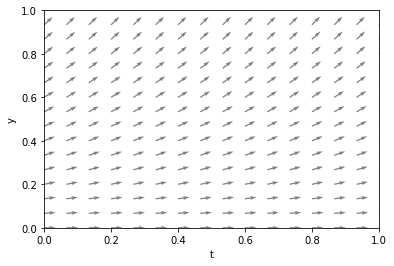

In [4]:
dirfield(fun, 0, 1, 0, 1)

Поверх построенного поля направлений
нарисуем графики некоторых частных решений:


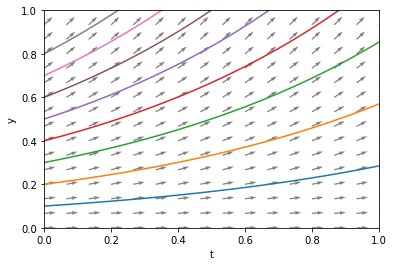

In [5]:
dirfield(fun, 0, 1, 0, 1)
t = np.linspace(0, 1)
y = np.exp(t - .1*np.cos(t))
c = np.arange(.1, .9, .1)*np.exp(.1);
plt.plot(t, np.outer(y, c))
pass

**Пример 2.** В качестве другого примера рассмотрим уравнение:
$$
y' = -10ty.
$$
Ее общее решение имеет вид $y=c e^{-5t^2}$, где $c$ - произвольная константа (проверьте подстановкой в уравнение!).

Изобразим поле направлений и некоторые частные решения для $-1\le t\le 1$, $0\le y\le 2$.

In [6]:
def fun2(t, y):
    return -10*t*y

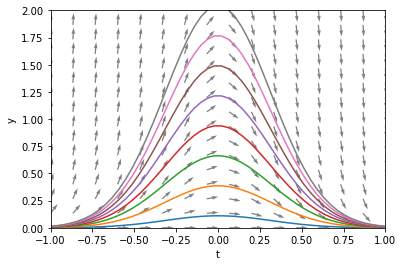

In [7]:
dirfield(fun2, -1, 1, 0, 2)
t = np.linspace(-1, 1)
y = np.exp(-5*t**2)
c = np.arange(.1, 1.9, .25)*np.exp(.1);
plt.plot(t, np.outer(y, c))
pass

## 2. Метод Эйлера

К сожалению, не все дифференциальные уравнения можно решить аналитически. Однако их можно решать численно.
*Метод Эйлера* - один из самых простых численных методов решения задачи Коши.

Итак, пусть дано дифференциальное уравнение
$$
    y' = f(t, y).  \tag{4}
$$
и начальное условие
$$
y(t_0) = y_0. \tag{5}
$$

Если $h$ - достачно мало, то
$$
    y' \approx \frac{y(t_0 + h) - y(t_0)}{h},
$$
поэтому, учитывая ($****$) получаем:
$$
y(t_0+h) \approx y(t_0) + h y'(t_0) = y_0 + h f(t_0, y_0).
$$
Значение 
$$
y_1 = y_0 + h f(t_0, y_0)
$$
является приближением к $y(t_1)$, где $t_1 = t_0+h$.
Аналогично получаем
$$
y(t_1+h) \approx y(t_1) + h y'(t_1) \approx y_1 + h f(t_1, y_1).
$$
Значение 
$$
y_2 = y_1 + h f(t_1, y_1)
$$
является приближением к $y(t_2)$, где $t_2 = t_1+h$.

Такого сорта итерации можно продолжать.
Получаем следующие расчетные формулы метода Эйлера:
$$
t_{k+1} = t_k + h,
\qquad
y_{k+1} = y_k + h f(t_k, y_k), 
\qquad
(k=0,1,2,\dots).
$$
$h$ называется *шагом интегрирования*.

Напишем код, реализующий метод Эйлера.
Функция `euler`, приведенная ниже, находит численное решение, представленное в векторах `t` и `y` для задачи Коши, решаемой на отрезке `t0`, `T`. 

In [8]:
def euler(fun, t0, T, y0, h):

    n = int((T - t0)/h) + 1
    t = np.zeros(n)
    y = np.zeros(n)

    t[0] = t0
    y[0] = y0

    for k in range(n - 1):
        t[k + 1] = t[k] + h
        y[k + 1] = y[k] + h*fun(t[k], y[k])

    return t, y

**Пример 1.** *(продолжение)*
Применим метод Эйлера к задаче.

In [9]:
t0 = 0
T  = 1
y0 = 1
h  = .1
t, y = euler(fun, t0, T, y0, h)

Точное ее решение

In [10]:
tt = np.linspace(t0, T, 500)
yy = y0*np.exp(tt - np.cos(tt) + 1)
pass

Изобразим численное и точное решение:

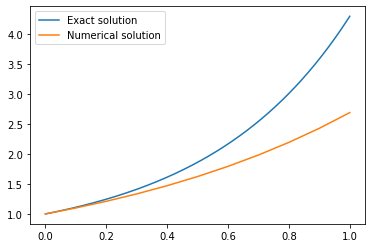

In [11]:
plt.plot(tt, yy, label='Exact solution')
plt.plot(t,  y,  label='Numerical solution')
plt.legend()
pass

Мы видим, что наблюдается большое расхождение с точным решением.

Решение можно попробовать улучшить, если уменьшить шаг интегрирования

In [12]:
h  = .00001
t, y = euler(fun, t0, T, y0, h)

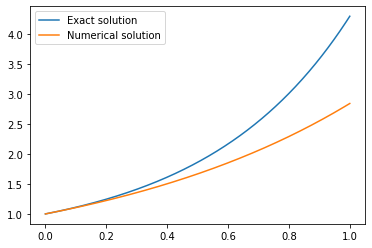

In [13]:
plt.plot(tt, yy, label='Exact solution')
plt.plot(t,  y,  label='Numerical solution')
plt.legend()
pass

Несмотря на то, что шаг взят очень маленьким, численное решение сильно отклоняется от точного. Проблемы возникают вследствие того, что уравнение неустойчиво.

В таком варианте метод Эйлера не может обеспечить приемлемую точность для данной задачи.

**Пример 2.** *(продолжение)* Опробуем функцию `euler` на задаче 

In [14]:
t0 = -1
T  = 1
y0 = .1
h  = .001
t, y = euler(fun2, t0, T, y0, h)

Точное решение:

In [15]:
tt = np.linspace(t0, T, 500)
yy = y0*np.exp(5*(1 - tt**2))
pass

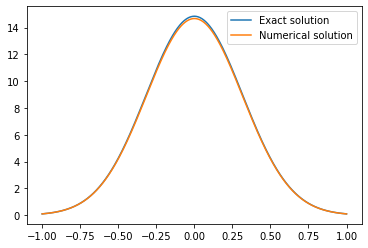

In [16]:
plt.plot(tt, yy, label='Exact solution')
plt.plot(t,  y,  label='Numerical solution')
plt.legend()
pass

Мы видим, что численное решение хорошо аппроксимирует аналитическое решение, однако такая точность достигается за счет слишком маленького шага и, следовательно, больших вычислительных затрат. Экспериментально исследуйте, как меняется точность при разных шагах.

Более сложные, чем метод Эйлера, методы позволяют получить хорошую точность при умеренном количестве итераций.

## 3. Решатели задачи Коши из библиотеки `scipy`

Продвинутые численные методы решения задачи Коши реализованы в функции `solve_ivp` модуля `integrate` библиотеки `scipy`. Функцию можно вызвать следующим образом: 
```
sol = integrate.solve_ivp(fun, tspan, y0)
```
Здесь `fun` - функция, вычисляющая правую часть дифференциального уравнения, `tspan` - отрезок интегрирования, `y0` - начальное значение для $y$ (`ivp` *означает initial-value problem* - начальная задача - это другое название для задачи Коши).

`sol` - структура, хранящая вычисленное решение и другую информацию о процессе решения. 
В частности, `sol.y` - вычисленные значения функции y в точках, указанных в дополнительном параметре `t_eval`

**Пример 1.** *(продолжение)*

In [17]:
t0 = 0
T  = 1
y0 = 1
tt  = np.linspace(t0, T, 500) 
sol = integrate.solve_ivp(fun, [t0, T], [y0], t_eval=tt)

In [18]:
yy = y0*np.exp(tt - np.cos(tt) + 1)
pass

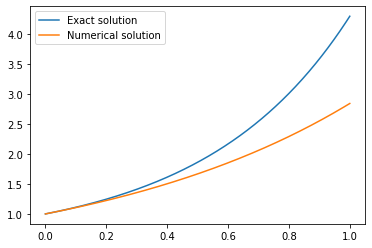

In [19]:
plt.plot(tt, yy, label='Exact solution')
plt.plot(sol.t,  sol.y[0],  label='Numerical solution')
plt.legend()
pass

Если в решателе установить дополнительный параметр `dense_output=True`, то в `sol.sol` возвращается функция, вычисляющая $y$.

In [20]:
sol = integrate.solve_ivp(fun, [t0, T], [y0], dense_output=True)

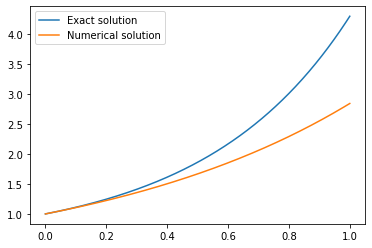

In [21]:
plt.plot(tt, yy, label='Exact solution')
plt.plot(tt,  sol.sol(tt)[0],  label='Numerical solution')
plt.legend()
pass

**Пример 2.** *(продолжение)*

In [22]:
t0 = -1
T  = 1
y0 = .1
tt  = np.linspace(t0, T, 500) 
sol = integrate.solve_ivp(fun2, [t0, T], [y0], t_eval=tt)

Точное решение:

In [23]:
yy = y0*np.exp(5*(1 - tt**2))
pass

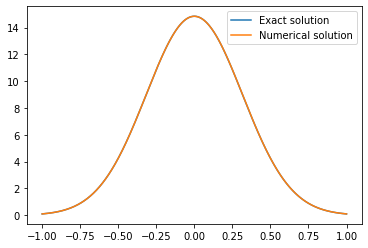

In [24]:
plt.plot(tt, yy, label='Exact solution')
plt.plot(tt, sol.y[0], label='Numerical solution')
plt.legend()
pass

Визуально численное и аналитическое решения совпадают.
Найдем максимальное отклонение:

In [25]:
from scipy import linalg
linalg.norm(yy-sol.y[0], np.Inf)

0.0047411227386895405

## 4. Системы дифференциальных уравнений

Рассмотрим простую экосистему, состоящую из особей двух видов:
хищников и жертв. Классическая *модель Вольтерра-Лотке* описывает ее 
системой двуx дифференциальных уравнений
$$
\left\{
\begin{array}{l}
   \frac{\displaystyle dx}{\displaystyle dt} = \alpha x - \gamma x y,\\
   \frac{\displaystyle dy}{\displaystyle dt} = -\beta y + \gamma x y \\
\end{array}
\right.
$$
и начальными условиями
$$
\left\{
\begin{array}{l}
   x(0) = x_0,\\
   y(0) = y_0.\\
\end{array}
\right.
$$
Здесь $x$ - численность жертв, $y$ - численность хищников,
$\alpha$, $\beta$, $\gamma$ - некоторые константы.
Если $\gamma = 0$, то популяции не взаимодействуют
и жертвы размножаются со скоростью, пропорциональной их численности,
а хищники вымирают. Если $\gamma > 1$, то хищники встречают жертв
с вероятностью пропорциональной произведению числа тех и других.
В результате таких встреч число жертв увеличивается,
а число хищников возрастает. 

Рассматриваемая нами система является системой дифференциальных уравнений
первого порядка, разрешенных относительно производных.
Общий вид такой системы следующий:
$$
\left\{
\begin{array}{l}
y'_1 = f_1(t, y_1,y_2,\dots,y_n),\\
y'_2 = f_2(t, y_1,y_2,\dots,y_n),\\
\dots \\
y'_n = f_n(t, y_1,y_2,\dots,y_n)\\
\end{array}
\right.                   \tag{6}
$$
Здесь $y_1(t),\dots,y_n(t)$ - искомые функции.
Вводя вектор-функции $y(t)$ и $f(t,y)$:
$$
  y(t) = 
         \left[
             \begin{array}{c} 
                 y_1(t) \\ y_2(t) \\ \vdots \\ y_n(t)
             \end{array}
         \right],
  \qquad
  f(t,y) = 
         \left[
             \begin{array}{c} 
                 f_1(t,y_1,y_2,\dots,y_n) \\ f_2(t,y_1,y_2,\dots,y_n) \\ \vdots \\ f_n(t,y_1,y_2,\dots,y_n)
             \end{array}
         \right]
$$
и определяя 
$$
   y' = \frac{dy}{dt} = 
           \left[
               \begin{array}{c} 
                   y_1' \\ y_2' \\ \vdots \\ y_n'
               \end{array}
           \right],
$$
мы можем записать (6)
в более простом виде
$$
    y'=f(t, y).
$$

*Частным решением* называется вектор-функция $y(t)$, такая, что все ее компоненты
удовлтворяют всем уравнениям системы.
Множество всех частных решений образует *общее решение*.
*Задача Коши* для системы уравнений заключается в поиске такого частного решения $y(t)$,
которе удовлетворяет также начальным условиям:
$$
    \left\{
    \begin{array}{l}
    y_1(t_0) = y_{10},\\
    y_2(t_0) = y_{20},\\
    \dots \\
    y_n(t_0) = y_{n0},\\
    \end{array}
    \right.
                 \quad\mbox{т.е.} \quad
    y(t_0)= y_0.
$$

Каждое частное решение мы можем изобразить в виде кривой $y=y(t)$ в пространстве
$y_1, y_2, \dots, y_n$, называемом *фазовым пространством*.
Сами кривые, изображающие решения, называются в этом пространстве *траекториями*.

Теория и алгоритмы для одного уравнения в основном переносятся и на случай системы дифференциальных
уравнений. В частности, разобранный выше метод Эйлера работает и для систем.

**Пример 3.** Модель распространения эпидемии SIR - см. отдельный файл

## 5. Дифференциальные уравнения высших порядков

Рассмотрим следующую задачу.

**Пример 4.** 
Человек бросает камень массы $m$
вертикально вверх с начальной скоростью $v_0$.
Предположим, что бросок проведен на высоте $h$.
Сила сопротивления воздуха пропорциональна квадрату скорости с коэффициентом
пропорциональности $\kappa$. 
Требуется определить высоту камня над землей как функцию времени.
В частности, необходимо установить, на какой высоте камень будет через
время $T$.

Пусть ось $Ox$ проходит через точку бросания камня и
направлена вертикально вверх. Точка $O$ на этой оси расположена на земле.
Обозначим $x(t)$ - расстояние от земли до камня в момент времени $t$.
Тогда проекция скорости на ось $Ox$ равна $x'$,
а проекция ускорения - $x''$.
Используя второй закон Ньютона,
получаем следующее *дифференциальное уравнение $2$-го порядка*:
$$
mx'' = -\kappa x' |x'| - mg,      \tag{7}
$$
где $g=9.8$ м/с - ускорение свободного падения.
(порядок у уравнения $2$-й, так как оно содержит
$2$-ю производную неизвестной функции $x(t)$).
В момент времени $t=0$ камень находился на высоте $h$
и имел скорость $v_0$,
поэтому
$$
     x(0) = h, \qquad  x'(0) = v_0.  \tag{8}
$$
Требуется найти функцию $x(t)$, удовлетворяющую уравнению (7)
и начальным условиям (8).

Сейчас мы приведем полученное уравнение к системе двух уравнений первого порядка. 
Обозначим $v(t)$ - скорость камня в момент времени $t$.
Так как $x'=v$ и $x''=v'$, то уравнение (7) и начальные
условия (8) можно записать в виде
$$
\left\{
   \begin{array}{l}
       x' = v,          \\
       v' = -\frac{\kappa}{m} v |v| - g,
   \end{array}
\right.
\qquad
   \begin{array}{l}
        x(0) = h, \\  v(0) = v_0.
   \end{array}
$$

В общем случае уравнение $n$-го порядка
$$
   x^{(n)} = f(t,x,x',\dots,x^{(n-1)})
$$
путем введения новых зависимых переменных 
$$
   y_1(t) = x,~ y_2(t) = x',~ y_3(t) = x'',~ \dots,~ y_n(t) = x^{(n-1)}
$$
приводится к системе
$$
   \left\{
      \begin{array}{lcllllll}
         y_1'     & = &      &      & y_2, &      &       &       \\
         y_2'     & = &      &      &      & y_3, &       &       \\
         \dots                                                    \\
         y_{n-1}' & = &      &      &      &      &       & y_n,  \\
         y_n'     & = & f(t, & y_1, & y_2, & y_3, & \dots,& y_n).
      \end{array}
   \right.
$$

**Пример 4.** *(продолжение)*


In [26]:
def stone(t, y):
    return [y[1], -k*y[1]*np.abs(y[1])/m-g]

In [27]:
t0 = 0
T = 2
g = 9.8
k = .01
m = .3
t  = np.linspace(t0, T, 500) 
h = .7
v0 = 10

sol = integrate.solve_ivp(stone, [t0, T], [h, v0], t_eval=t)

Построим графики зависимости высоты $x$ от времени $t$ и скорости $x'$ от $t$, а также график зависимости $x$ от $x'$ - это так называемая *фазовая траектория*.

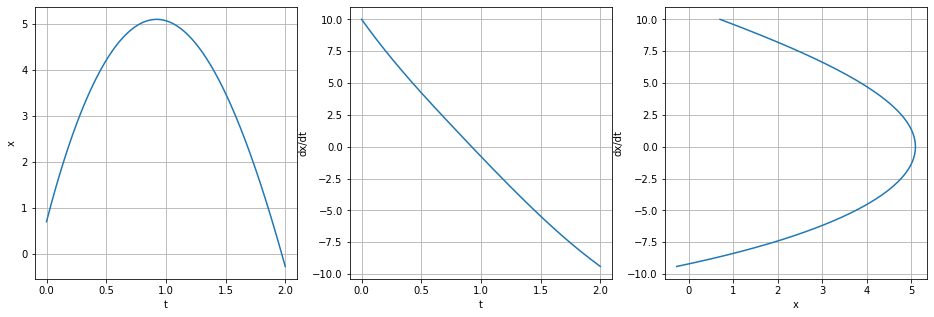

In [28]:
plt.figure(figsize = (16, 5))

plt.subplot(1, 3, 1)
plt.plot(t, sol.y[0,:])
plt.xlabel('t')
plt.ylabel('x')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(t, sol.y[1,:])
plt.xlabel('t')
plt.ylabel('dx/dt')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(sol.y[0,:], sol.y[1,:])
plt.xlabel('x')
plt.ylabel('dx/dt')
plt.grid()
pass

## 6. События

В последнем примере нам бы хотелось, по-видимому, завершить процесс интегрирования в тот момент, когда камень окажется на земле, т.е. $x(t)$ не станет равным нулю. Также было бы интересно (по ходу вычислений) определить, находится ли камень в своей наивысшей точке, т.е. $x'(t)=0$. Отслеживать такого сорта *события* можно с помощью одноименного механизма (*events*), реализуемого в функции `solve_ivp`.

События связываются с обращением в нуль некоторых индикаторных функций.
Эти функции могут зависеть от значений функций $y_1, y_2, \dots, y_n$ и от значений переменной $t$. 
В процессе интегрирования уравнения решатель `solve_ivp` выявляет события и вызывает пользовательский обработчик.

Решатель может обрабатывать несколько типов событий.
Для каждого такого типа пользователь должен написать функцию вида
`event_function(t, y)`, вычисляющую свою индикаторную функцию. 
Кроме этого можно задать два атрибута этой функции:

- `terminal` - булево значение: если его значение `True`, то при возникновении события интегрирование уровнения завершается; 
   по умолчанию - процесс интегрирования не останавливается;  
- `direction` - вещественное число: 
   - если положительно, то считается, что событие совершается только в случае, 
     если значение индикаторной функции не только обратилось в нуль, но возрастает в этот момент;
   - если отрицательно, то событие совершается только в случае, 
     если значение индикаторной функции обратилось в нуль и убывает;
   - если равно нулю, то считается, что событие совершается, если индикаторная функция обратилась в ноль 
     и не важно, как она менялась в этот момент.

Значения времени, в которые происходили события, возвращаются в `sol.t_events`.

Заметим, что если вы ожидаете, что интегрирование закончится в результате наступления некоторого события, то в качестве конечного момента времени можно указать `np.Inf`.

**Пример 4.** (*продолжение*)

Будем отслеживать два события: камень достиг наивысшей точки ($x'=0$) и камень оказался на земле ($x=0$, $x$ убывает).

В случае, если происзходит второе событие, процесс интегрирования завершается.


In [29]:
def event_highest(t, y):
    return y[1] # событие случается, если y[1] = x' = 0

def event_ground(t, y):
    return y[0] # событие случается, если y[0] = x = 0

event_ground.terminal  = True
event_ground.direction = -1

Вызываем решатель:

In [30]:
t0 = 0
g = 9.8
k = .01
m = .3
h = .7
v0 = 10

sol = integrate.solve_ivp(stone, [t0, np.Inf], [h, v0], dense_output=True, events=[event_highest, event_ground])

In [31]:
t_highest = sol.t_events[0][0]
x_highest = sol.sol(t_highest)[0]

t_ground  = sol.t_events[1][0]
v_ground  = sol.sol(t_ground)[1]

In [32]:
print('Камень в наивысшей точке: t = {:7.4f} c, x = {:7.4f}'.format(t_highest, x_highest))
print('Камень на земле:          t = {:7.4f} c, v = {:7.4f}'.format(t_ground,  v_ground))

Камень в наивысшей точке: t =  0.9218 c, x =  5.0918
Камень на земле:          t =  1.9707 c, v = -9.1986


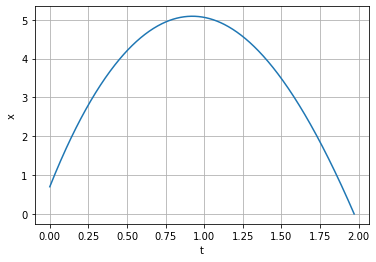

In [33]:
t  = np.linspace(t0, t_ground, 500) 

plt.plot(t, sol.sol(t)[0])
plt.xlabel('t')
plt.ylabel('x')
plt.grid()

**Пример 5.** (*продолжение*)

Парашютист прыгает с парашютом из самолета на расстоянии $H$ от земли.
На расстоянии $h$ от земли он раскрывает парашют.
Найдем время спуска и скорость приземления.

Движение парашютися описывается таким же дифференциальным уравнением, что и движение камня, но с другими начальными условиями и меняющимся коэффициентом сопротивления $\kappa$:
$$
mx'' = -\kappa x' |x'| - mg, \qquad x(t_0) = H, \qquad x'(t_0) = 0, \qquad 
\kappa = 
         \left\{
             \begin{array}{ll}
                  \kappa_0,       & \mbox{если } x  >  h, \\
                  \kappa_{\rm p}, & \mbox{если } x \le h.
             \end{array}
         \right.
$$

In [34]:
def parachute(t, y):
    if y[0] > h: # т.е. x > h
        k = k0
    else:
        k = kp
    return [y[1], -k*y[1]*np.abs(y[1])/m-g] # т.е. [x', -k x' |x'|/m - g]

In [35]:
def event_parachute(t, y):
    return y[0] - h # событие случается, если y[0] = x = h (раскрывается парашют)

def event_ground(t, y):
    return y[0] # событие случается, если y[0] = x = 0 (приземление парашютиста)

event_ground.terminal  = True
event_ground.direction = -1

In [36]:
t0 = 0    # начальный момент времени
H  = 4000 # исходная высота
v0 = 0    # начальная скорость
h  = 700  # высота, на которой раскрывается парашют
m  = 120  # общая масса
k0 = .24  # коэффициент сопротивления воздуха для парашютиста до раскрытия парашюта
kp = 45   # коэффициент сопротивления воздуха с раскрытым парашютом
g  = 9.8  # ускорение свободного падения

sol = integrate.solve_ivp(parachute, [t0, np.Inf], [H, v0], dense_output=True, events=[event_parachute, event_ground])

In [37]:
t_parachute = sol.t_events[0][0]
v_parachute = sol.sol(t_parachute)[1]

t_ground    = sol.t_events[1][0]
v_ground    = sol.sol(t_ground)[1]

In [38]:
print('Раскрытие парашюта: t = {:7.4f} c, v = {:7.4f}'.format(t_parachute, v_parachute))
print('Приземление:        t = {:7.4f} c, v = {:7.4f}'.format(t_ground,    v_ground))

Раскрытие парашюта: t = 52.0920 c, v = -69.7971
Приземление:        t = 187.9550 c, v = -5.1147


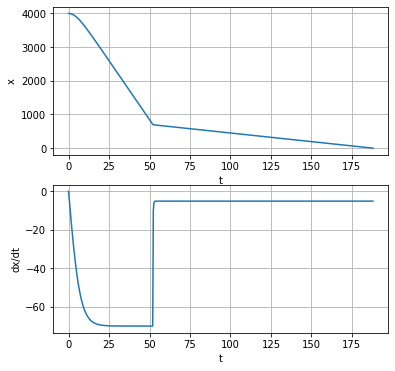

In [39]:
t = np.linspace(t0, t_ground, 500) 
x, v = sol.sol(t)

plt.figure(figsize = (6, 6))

plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, v)
plt.xlabel('t')
plt.ylabel('dx/dt')
plt.grid()

**Замечание.** 
В условиях падения с учетом сопротивления воздуха скорость нарастает, но вместе с этим увеличивается сопротивление (пропорциональное квадрату этой скорости). В результате скорость перестает меняться, когда достигает (с математической точки зрения - асимптотически) некоторой устоявшейся скорости. Т.е. через какое-то время начинает падать с постоянной скоростью. Это хорошо видно на графике для зависимости скорости от времени. Скорости, конечно, различны и зависят от того считаем ли мы ее до или после раскрытия парашюта.

Заметим, что устоявшуюся скорость можно вычислить, положив в уравнении $x''=0$. Получаем
$$
mx'' = -\kappa x' |x'| - mg = 0,
$$
откуда для устоявшейся скорости получаем
$$
|x'|=\sqrt{\frac{mg}{\kappa}}.
$$
Для нашего случая эти скорости равны

In [40]:
np.sqrt(m*g/k0), np.sqrt(m*g/kp) 

(70.0, 5.11207720338155)

что практически совпадает со значениями, найденными через численное решение уравнения. 

## Выводы

- Дифференциальные уравнения – один из основных инструментов математического моделирования.
- Огромное количество дифференциальных уравнений не удается решить аналитически и их приходится решать численно.
- Задача Коши - это задача нахождения решения системы дифференциальных уранвнений, при известных начальных условиях.
- Разработаны многие методы численного решения задачи Коши, однако некоторые системы не удается решать с приемлемой точностью.
- Обыкновенные дифференциальные уравнения высших порядков сводятся к системам дифференциальных уравнений 1-го порядка.